# Feature Selection Experiment

In [1]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('paper')


In [2]:
df_pollutants = pd.read_csv('../data/cached_air_pollution_data.csv')
df_climate = pd.read_csv('../data/cached_openweather_data.csv')

In [3]:
df_combined = df_climate.join(df_pollutants.set_index(['latitude', 'longitude']), on=['latitude', 'longitude'], how='left')
df_combined = df_combined.loc[:, df_combined.columns.difference(['no', 'nh3'])]

In [4]:
df_combined

,clouds_all,co,feels_like,humidity,latitude,longitude,no2,o3,pm10,pm2_5,pressure,so2,temp,temp_max,temp_min,timestamp,wind_deg,wind_speed
0,12.0,270.37,270.21,89.0,50.866580,-2.173528,15.25,31.83,4.98,4.33,1010.0,1.48,274.13,275.08,272.51,1701450000,13.0,3.80
1,12.0,270.37,270.21,89.0,50.875335,-2.173528,15.25,31.83,4.98,4.33,1010.0,1.48,274.13,275.08,272.51,1701450000,13.0,3.80
2,12.0,270.37,270.21,89.0,50.884090,-2.173528,15.25,31.83,4.98,4.33,1010.0,1.48,274.13,275.08,272.51,1701450000,13.0,3.80
3,12.0,270.37,270.21,89.0,50.892845,-2.173528,15.25,31.83,4.98,4.33,1010.0,1.48,274.13,275.08,272.51,1701450000,13.0,3.80
4,12.0,280.38,270.21,89.0,50.901600,-2.173528,20.22,25.75,5.79,5.02,1010.0,1.94,274.13,275.08,272.51,1701450000,13.0,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,20.0,270.37,270.77,77.0,52.573809,0.312971,10.37,34.69,1.61,0.95,1010.0,0.56,273.28,274.27,272.96,1701450000,20.0,2.06
39996,20.0,270.37,270.77,77.0,52.582564,0.312971,10.37,34.69,1.61,0.95,1010.0,0.56,273.28,274.27,272.96,1701450000,20.0,2.06
39997,20.0,270.37,270.77,77.0,52.591319,0.312971,10.37,34.69,1.61,0.95,1010.0,0.56,273.28,274.27,272.96,1701450000,20.0,2.06
39998,20.0,270.37,270.77,77.0,52.600074,0.312971,10.37,34.69,1.61,0.95,1010.0,0.56,273.28,274.27,272.96,1701450000,20.0,2.06


In [5]:
df_corr = df_combined.corr().loc[df_climate.columns,df_pollutants.columns.difference(['no', 'nh3', 'latitude', 'longitude'])]

In [6]:
df_corr

,co,no2,o3,pm10,pm2_5,so2,timestamp
latitude,0.266801,0.060328,-0.208625,0.095290,0.069663,-0.111629,NaN
longitude,-0.389895,-0.216451,0.193453,-0.611104,-0.626643,-0.050276,NaN
feels_like,0.016811,0.163580,-0.146947,0.019723,0.015104,0.196187,NaN
temp,-0.431746,-0.216807,0.247803,-0.532879,-0.525683,-0.021066,NaN
temp_min,-0.491421,-0.399072,0.388168,-0.643017,-0.638368,-0.207819,NaN
temp_max,-0.260013,0.019376,0.042668,-0.331680,-0.330130,0.203573,NaN
humidity,0.180462,0.109755,-0.108579,0.239033,0.240796,0.035218,NaN
clouds_all,-0.180119,-0.141703,0.122438,-0.269908,-0.268105,-0.085959,NaN
wind_deg,-0.086450,-0.092134,0.087513,-0.133482,-0.138592,-0.071684,NaN
pressure,0.126306,0.035381,-0.116355,0.078917,0.074545,-0.039695,NaN


/Users/anjanayodaiken/anaconda3/envs/L48-Project_rev2/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


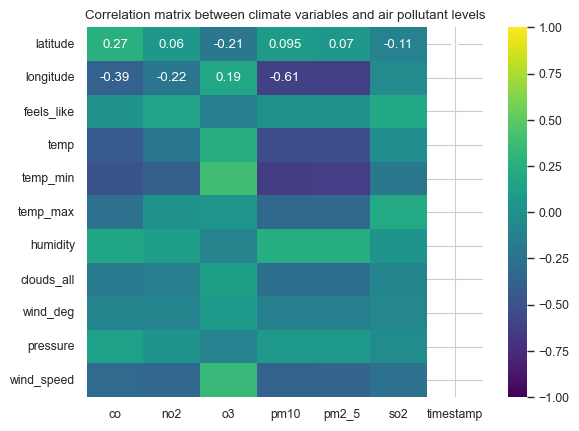

In [7]:
heatmap = sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, cmap='viridis')
heatmap.set_title('Correlation matrix between climate variables and air pollutant levels')
plt.savefig('../figs/heatmap.pdf', bbox_inches='tight')
plt.savefig('../figs/heatmap.png', bbox_inches='tight')

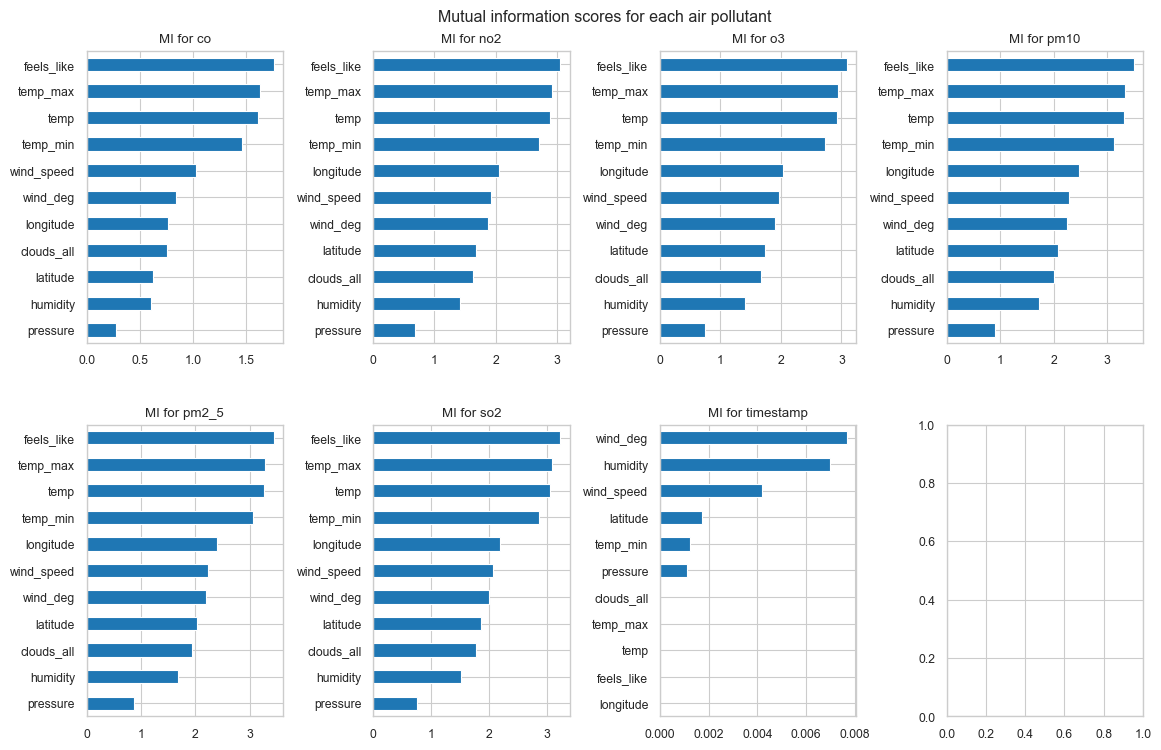

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
fig.tight_layout(pad=4.0)

axs = axs.flatten()

for i, target in enumerate(df_pollutants.columns.difference(['no', 'nh3', 'latitude', 'longitude'])):
	mi = mutual_info_regression(df_combined[df_climate.columns], df_combined[target])
	mutual_info = pd.Series(mi)
	mutual_info.index = df_climate.columns
	
	mutual_info.sort_values().plot.barh(title=f"MI for {target}", ax=axs[i])
fig.suptitle('Mutual information scores for each air pollutant')
fig.savefig('../figs/mutual_info.pdf')
fig.savefig('../figs/mutual_info.png')

In [9]:
climate_variables = [
    "feels_like",
    "temp_max",
            "temp",
    "temp_min",
    "wind_speed",
        "wind_deg",
        "clouds_all",
    "humidity",


    "pressure",

]

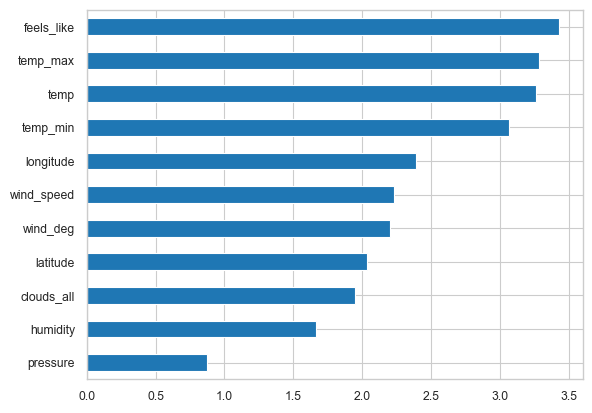

In [11]:
mi = mutual_info_regression(df_combined[df_climate.columns], df_pollutants['pm2_5'])
mutual_info = pd.Series(mi)
mutual_info.index = df_climate.columns

mutual_info.sort_values().plot.barh()

plt.savefig("../figs/pm2_5_mi.pdf", bbox_inches='tight')
plt.savefig("../figs/pm2_5_mi.png", bbox_inches='tight')